# GeoTagger

This notebook explores the possibility of using various libraries to discover untagged/marked placenames within XML documents. The goal is to assess the effectiveness of different libraries and determine whether they could be useful for guided encoding revisions.

In [1]:
# Import necessary libraries.
import re, nltk
import pandas as pd
import numpy as np
from collections import Counter
from nltk import word_tokenize, pos_tag, ne_chunk, Tree

# Declare directory location to shorten filepaths later.
abs_dir = "/Users/quinn.wi/Documents/SemanticData/"

# Read in dataframe of parsed xml files.
df = pd.read_csv(abs_dir + 'Output/ParsedXML/JQA_dataframe.txt', sep = '\t')

## NLTK

https://stackoverflow.com/questions/48660547/how-can-i-extract-gpelocation-using-nltk-ne-chunk

CPU times: user 159 ms, sys: 22.9 ms, total: 182 ms
Wall time: 182 ms


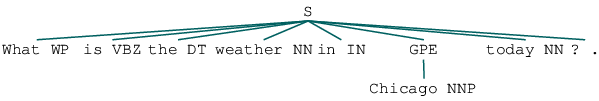

In [2]:
%%time

sent = "What is the weather in Chicago today?"
ne_chunk(pos_tag(word_tokenize(sent)))

In [3]:
def get_continuous_chunks(text, label):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    prev = None
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == Tree and subtree.label() == label:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
        if current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    return continuous_chunk

In [4]:
get_continuous_chunks(sent, 'GPE')

['Chicago']

## Apply NLTK Location (GPE) Tagger

In [8]:
%%time

df['locations'] = df.apply(lambda row: get_continuous_chunks(row['content'], 'GPE'),
                           axis = 1)

df.head()

CPU times: user 2min 58s, sys: 1.03 s, total: 2min 59s
Wall time: 3min


,file,content,locations
0,"('JQADiaries-v49-1825-01-p795.xml',)","1. VI:30. H. Humphreys here, for Methodist Chu...","[South America, Mountain, Havana, Columbian, F..."
1,"('JQADiaries-v49-1825-06-p849.xml',)",1. IV: symbols 1/2 symbols 35 symbols 36. symb...,"[Coln, Captain, Collector, George, Drawers, Tw..."
2,"('JQADiaries-v33-1825-03-p101.xml',)",1. VII. Visitors W. N. Edwards of North-Caroli...,"[North-Carolina, Ohio, Bath, Portuguese, Washi..."
3,"('JQADiaries-v49-1825-08-p891.xml',)",1. IV.30. Walk of an hour instead of the bath ...,"[Netherlands, Indian, Michigan Territory, Indi..."
4,"('JQADiaries-v49-1825-07-p865.xml',)",1. IV:45 Friday. symbols 2. V. symbols 30 sym...,"[Purser, Eastern, Northern East, Church, Indep..."


TypeError: 'numpy.ndarray' object is not callable